In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, auc

df = pd.DataFrame({'y': [0,1,0,1,0,0,1,0,1,1], 'score':[-10,-8,-8,0,0,10,12,15,20,20]})

# Part a
lr = LogisticRegression(penalty='none')
lr.fit(df[['score']], df['y'])
prob = np.apply_along_axis(lambda x: x[1], 1, lr.predict_proba(df[['score']]))

print(tabulate({'Score': df['score'], 'Probability': prob}, headers="keys"), 
      file=open('Q12.12a output.txt', 'w'))

In [62]:
# Part b
platt_prob = lr.predict_proba(pd.DataFrame([1]))[0][1]

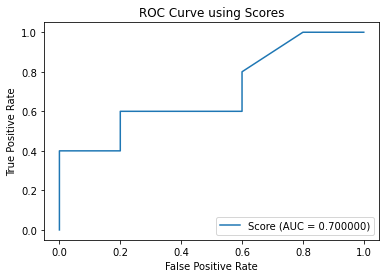

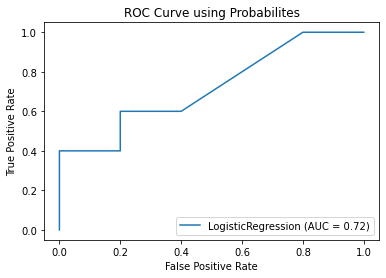

In [63]:
np.random.seed(0)

tpr_values = []
fpr_values = []
for n in range(min(df['score'])-1, max(df['score'])+2):
    prediction = df['score'].map(lambda x: 0 if x < n else (1 if x > n else int(np.random.randint(0, 2, 1, dtype=int))))
    true_ind = list(df[df['y'] == 1].index)
    false_ind = list(df[df['y'] == 0].index)
    tpr = sum(prediction[true_ind]) / len(true_ind)
    tpr_values.append(tpr)
    fpr = sum(prediction[false_ind]) / len(false_ind)
    fpr_values.append(fpr)

roc_by_score = plt.plot(fpr_values, tpr_values, label="Score (AUC = %f)" % auc(fpr_values, tpr_values))
plt.margins(.05)
plt.title('ROC Curve using Scores')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Q12.12 ROC by score.png')

roc_by_platt = plot_roc_curve(lr, X=df[['score']], y=df['y'])
plt.title('ROC Curve using Probabilites')
plt.savefig('Q12.12 ROC by platt.png')